In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 

In [2]:
data=pd.read_excel("iris.xls")

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.shape

(150, 5)

In [5]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'boxplot of SL')

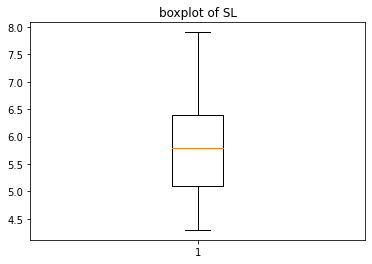

In [7]:
plt.boxplot(data['SL'])
plt.title('boxplot of SL')

Text(0.5, 1.0, 'boxplot of SW')

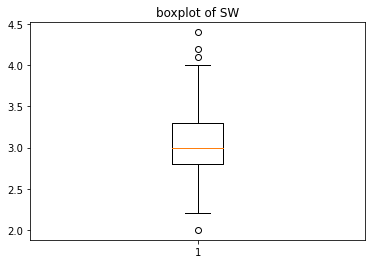

In [8]:
plt.boxplot(data['SW'])
plt.title('boxplot of SW')

In [10]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outlier=[]
for x in data['SW']:
    if ((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier     

[4.4, 4.1, 4.2, 2.0]

In [11]:
ind1=data['SW']>up_lim
data.loc[ind1].index
ind2=data['SW']<low_lim
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [12]:
data.drop([15,32,33,60],inplace=True)

Text(0.5, 1.0, 'boxplot of SW')

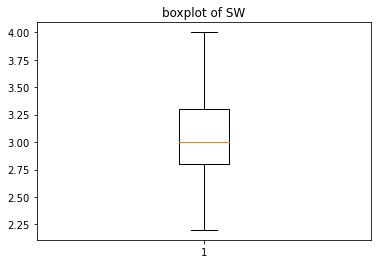

In [16]:
plt.boxplot(data['SW'])
plt.title('boxplot of SW')

Text(0.5, 1.0, 'boxplot of PL')

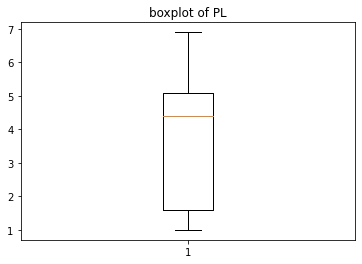

In [14]:
plt.boxplot(data['PL'])
plt.title('boxplot of PL')

Text(0.5, 1.0, 'boxplot of PW')

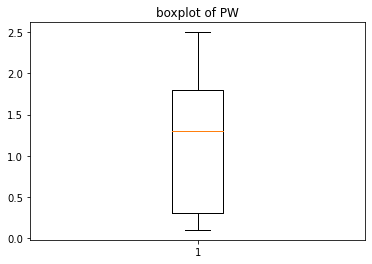

In [15]:
plt.boxplot(data['PW'])
plt.title('boxplot of PW')

In [17]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_encoder.fit_transform(data[a[i]])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
y=pd.DataFrame(data['Classification'])
X=data.drop(['Classification'],axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(30, 1)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train.values.ravel())

LogisticRegression()